In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
G=nx.Graph()

In [3]:
inputedges = pd.read_csv('./data/mammal_edges.csv')
inputnodes = pd.read_csv('./data/mammal_nodes.csv')

for i,r in inputnodes.iterrows():
    G.add_node(r['Node'])
    
dfId = pd.DataFrame()
IdCount = 1
for i,r in inputedges.iterrows():
    G.add_edge(r['Source'],r['Target'], weight=r['Weight'])
    
    #Generate the dataset for graphic nodes in Tableau
    temp = pd.DataFrame(columns=["ID", "Node", "Source","Target", "Relationship"])
    s = pd.Series([0,0,0,0,0], index=["ID", "Node", "Source","Target", "Relationship"])
    temp = temp.append(s, ignore_index=True)
    temp["Node"] = r['Source']
    temp["Source"] = r['Source']
    temp["Target"] = r['Target']
    #temp["Weight"] = weight=r['Weight']
    temp["ID"] = IdCount
    temp["Relationship"] = "%s-->%s"%(r['Source'],r['Target'])
    
    dfId = dfId.append(temp)
    temp["Node"] = r['Target']
    dfId = dfId.append(temp)
    IdCount = IdCount + 1

In [4]:
dfId.head()

,ID,Node,Source,Target,Relationship
0,1,Bird,Bird,Accipitriformes,Bird-->Accipitriformes
0,1,Accipitriformes,Bird,Accipitriformes,Bird-->Accipitriformes
0,2,Accipitriformes,Accipitriformes,Accipitridae,Accipitriformes-->Accipitridae
0,2,Accipitridae,Accipitriformes,Accipitridae,Accipitriformes-->Accipitridae
0,3,Accipitridae,Accipitridae,Cooper's Hawk,Accipitridae-->Cooper's Hawk


In [5]:
pos=nx.spring_layout(G, dim=2, k=0.3, iterations=10, scale=1.0)

# shells = [['Mammal'],\
#  ['Artiodactyla',\
#   'Carnivora',\
#   'Chiroptera',\
#   'Lagomorpha',\
#   'Rodentia',\
#   'Soricomorpha',\
#   'Cetacea',\
#   'Didelphimorphia',\
#   'Perissodactyla',\
#   'Sirenia',\
#   'Cingulata',\
#   'Primates']]
# pos=nx.shell_layout(G, shells)
#pos=nx.shell_layout(G)
#pos=nx.spectral_layout(G)
#pos=nx.random_layout(G)

In [6]:
nx.set_node_attributes(G,'pos',pos)

In [7]:
labeldict = {}
for i in list(G.nodes()):
    istr = str(i)
    labeldict[i]=istr

In [8]:
# pos[-2] = [100.0, 0.0]
# pos[-1] = [0.0, 100.0]

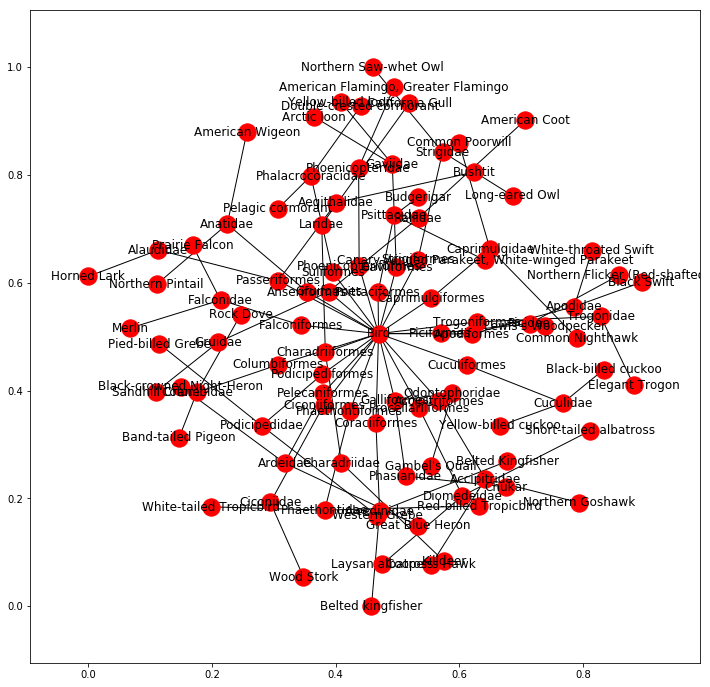

In [9]:
plt.figure(figsize=(12,12))
#nx.draw(G, pos=pos)
nx.draw_networkx(G, pos, labels=labeldict)
#plt.savefig("network_graph.png")
plt.show()

In [10]:
#pos

In [11]:
positions = pd.DataFrame(pos).transpose()
positions.columns = ['X','Y']

In [12]:
positions["CycleY"] = positions["Y"]

In [13]:
positions["Node"] = positions.index

In [14]:
positions.head()

,X,Y,CycleY,Node
Accipitridae,0.642165,0.236118,0.236118,Accipitridae
Accipitriformes,0.567338,0.380051,0.380051,Accipitriformes
Aegithalidae,0.401018,0.748674,0.748674,Aegithalidae
Alaudidae,0.113354,0.660754,0.660754,Alaudidae
Alcedinidae,0.471090,0.175908,0.175908,Alcedinidae


In [15]:
result = pd.merge(dfId, positions, on='Node', how='left')

In [16]:
result = pd.merge(result, inputnodes, on='Node', how='left')

In [17]:
result.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,288.0,72.500000,41.640573,1.0,36.750000,72.500000,108.250000,144.000000
X,288.0,0.471766,0.162126,0.0,0.379262,0.469366,0.567338,0.894507
Y,288.0,0.500995,0.189047,0.0,0.380051,0.505549,0.603701,1.000000
CycleY,288.0,0.500995,0.189047,0.0,0.380051,0.505549,0.603701,1.000000
Weight,288.0,86.666667,58.315494,20.0,50.000000,75.000000,100.000000,200.000000


In [18]:
result.shape

(288, 13)

In [19]:
result.head()

,ID,Node,Source,Target,Relationship,X,Y,CycleY,Category,Order,Family,Common Names,Weight
0,1,Bird,Bird,Accipitriformes,Bird-->Accipitriformes,0.469366,0.505549,0.505549,Bird,0,0,0,200
1,1,Accipitriformes,Bird,Accipitriformes,Bird-->Accipitriformes,0.567338,0.380051,0.380051,0,Accipitriformes,0,0,100
2,2,Accipitriformes,Accipitriformes,Accipitridae,Accipitriformes-->Accipitridae,0.567338,0.380051,0.380051,0,Accipitriformes,0,0,100
3,2,Accipitridae,Accipitriformes,Accipitridae,Accipitriformes-->Accipitridae,0.642165,0.236118,0.236118,0,0,Accipitridae,0,50
4,3,Accipitridae,Accipitridae,Cooper's Hawk,Accipitridae-->Cooper's Hawk,0.642165,0.236118,0.236118,0,0,Accipitridae,0,50


In [20]:
result.to_csv('./data/mammal_nodepositions.csv', index=False)